In [2]:
import torch
print("CUDA is available: ", torch.cuda.is_available())
print("Number of GPUs: ", torch.cuda.device_count())

CUDA is available:  True
Number of GPUs:  1


In [2]:
import os

def rename_images_in_folder(folder_path, prefix):
    # Lấy danh sách file ảnh trong thư mục
    files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    # Duyệt qua từng file và đổi tên theo format mới
    for idx, file_name in enumerate(files, start=1):
        # Định dạng tên mới với chỉ số có 2 chữ số, ví dụ person_01.jpg
        new_name = f"{prefix}_{idx:02d}.jpg"
        # Đường dẫn cũ và mới của file
        old_path = os.path.join(folder_path, file_name)
        new_path = os.path.join(folder_path, new_name)
        # Đổi tên file
        os.rename(old_path, new_path)
        print(f"Renamed {file_name} to {new_name}")

# Đường dẫn tới thư mục chứa ảnh
person_folder = r"D:\Shop_Thoi_Trang_Ao\data_1\Person"
clothes_folder = r"D:\Shop_Thoi_Trang_Ao\data_1\Clothes"

# Đổi tên ảnh trong từng thư mục với tiền tố phù hợp
rename_images_in_folder(person_folder, "person")
rename_images_in_folder(clothes_folder, "clothes")

Renamed person_image (1).jpg to person_01.jpg
Renamed person_image (1).png to person_02.jpg
Renamed person_image (10).jpg to person_03.jpg
Renamed person_image (10).png to person_04.jpg
Renamed person_image (100).jpg to person_05.jpg
Renamed person_image (100).png to person_06.jpg
Renamed person_image (1000).png to person_07.jpg
Renamed person_image (1001).png to person_08.jpg
Renamed person_image (1002).png to person_09.jpg
Renamed person_image (1003).png to person_10.jpg
Renamed person_image (1004).png to person_11.jpg
Renamed person_image (1005).png to person_12.jpg
Renamed person_image (1006).png to person_13.jpg
Renamed person_image (1007).png to person_14.jpg
Renamed person_image (1008).png to person_15.jpg
Renamed person_image (1009).png to person_16.jpg
Renamed person_image (101).jpg to person_17.jpg
Renamed person_image (101).png to person_18.jpg
Renamed person_image (1010).png to person_19.jpg
Renamed person_image (1011).png to person_20.jpg
Renamed person_image (1012).png to

In [5]:
import os

def create_pairs_file_repeat(person_folder, clothes_folder, output_file="pairs.txt"):
    # Lấy danh sách file ảnh trong hai thư mục
    person_images = sorted([f for f in os.listdir(person_folder) if f.startswith("person")])
    clothes_images = sorted([f for f in os.listdir(clothes_folder) if f.startswith("clothes")])

    # Xác định số lượng cặp cần tạo
    max_pairs = max(len(person_images), len(clothes_images))
    
    # Mở file pairs.txt để ghi
    with open(output_file, "w") as file:
        for i in range(max_pairs):
            # Sử dụng modulo để lặp lại ảnh nếu hết danh sách
            person = person_images[i % len(person_images)]
            clothes = clothes_images[i % len(clothes_images)]
            file.write(f"{person},{clothes}\n")
            print(f"Paired {person} with {clothes}")

    print(f"File {output_file} đã được tạo thành công với {max_pairs} cặp.")

# Đường dẫn tới thư mục chứa ảnh
person_folder = r"D:\Shop_Thoi_Trang_Ao\data_1\Person"
clothes_folder = r"D:\Shop_Thoi_Trang_Ao\data_1\Clothes"
# Tạo file pairs.txt
create_pairs_file_repeat(person_folder, clothes_folder)

Paired person_01.jpg with clothes_01.jpg
Paired person_02.jpg with clothes_02.jpg
Paired person_03.jpg with clothes_03.jpg
Paired person_04.jpg with clothes_04.jpg
Paired person_05.jpg with clothes_05.jpg
Paired person_06.jpg with clothes_06.jpg
Paired person_07.jpg with clothes_07.jpg
Paired person_08.jpg with clothes_08.jpg
Paired person_09.jpg with clothes_09.jpg
Paired person_10.jpg with clothes_10.jpg
Paired person_100.jpg with clothes_100.jpg
Paired person_1000.jpg with clothes_1000.jpg
Paired person_1001.jpg with clothes_1001.jpg
Paired person_1002.jpg with clothes_1002.jpg
Paired person_1003.jpg with clothes_1003.jpg
Paired person_1004.jpg with clothes_1004.jpg
Paired person_1005.jpg with clothes_1005.jpg
Paired person_1006.jpg with clothes_1006.jpg
Paired person_1007.jpg with clothes_1007.jpg
Paired person_1008.jpg with clothes_1008.jpg
Paired person_1009.jpg with clothes_1009.jpg
Paired person_101.jpg with clothes_101.jpg
Paired person_1010.jpg with clothes_1010.jpg
Paired pe

In [7]:
import cv2
import os

def load_image_pairs(pairs_file, person_folder, clothes_folder, img_size=(256, 256)):
    image_pairs = []
    with open(pairs_file, 'r') as file:
        lines = file.readlines()
        for line in lines:
            person_img_name, clothes_img_name = line.strip().split(',')
            
            # Đọc ảnh từ thư mục person và clothes
            person_img_path = os.path.join(person_folder, person_img_name)
            clothes_img_path = os.path.join(clothes_folder, clothes_img_name)
            person_img = cv2.imread(person_img_path)
            clothes_img = cv2.imread(clothes_img_path)
            
            # Kiểm tra nếu không đọc được ảnh
            if person_img is None:
                print(f"Lỗi: Không thể đọc ảnh {person_img_path}")
                continue
            if clothes_img is None:
                print(f"Lỗi: Không thể đọc ảnh {clothes_img_path}")
                continue
            
            # Resize ảnh về kích thước chuẩn
            person_img = cv2.resize(person_img, img_size)
            clothes_img = cv2.resize(clothes_img, img_size)
            
            # Thêm cặp ảnh vào danh sách
            image_pairs.append((person_img, clothes_img))
    
    return image_pairs

# Đường dẫn đến file và thư mục
pairs_file = r"D:\Shop_Thoi_Trang_Ao\data_1\pairs.txt"
person_folder = r"D:\Shop_Thoi_Trang_Ao\data_1\Person"
clothes_folder = r"D:\Shop_Thoi_Trang_Ao\data_1\Clothes"

# Tải dữ liệu
image_pairs = load_image_pairs(pairs_file, person_folder, clothes_folder)
print(f"Tải thành công {len(image_pairs)} cặp ảnh.")

Lỗi: Không thể đọc ảnh D:\Shop_Thoi_Trang_Ao\data_1\Clothes\clothes_1095.jpg
Lỗi: Không thể đọc ảnh D:\Shop_Thoi_Trang_Ao\data_1\Clothes\clothes_1467.jpg
Lỗi: Không thể đọc ảnh D:\Shop_Thoi_Trang_Ao\data_1\Clothes\clothes_1095.jpg
Lỗi: Không thể đọc ảnh D:\Shop_Thoi_Trang_Ao\data_1\Clothes\clothes_1467.jpg
Tải thành công 2636 cặp ảnh.


In [8]:
import tensorflow as tf
from tensorflow.keras import layers

def build_unet_model(input_shape=(256, 256, 3)):
    inputs = tf.keras.Input(shape=input_shape)

    # Encoder
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    p1 = layers.MaxPooling2D((2, 2))(c1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    # Bottleneck
    b1 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)

    # Decoder
    u1 = layers.UpSampling2D((2, 2))(b1)
    d1 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u1)
    u2 = layers.UpSampling2D((2, 2))(d1)
    d2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u2)

    # Output Layer
    outputs = layers.Conv2D(3, (1, 1), activation='sigmoid')(d2)

    model = tf.keras.Model(inputs, outputs)
    return model

# Khởi tạo mô hình
unet_model = build_unet_model()
unet_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 128, 128, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 128)  │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 256, 256, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 256, 256, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 256, 256, 3)    │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 739,843 (2.82 MB)

 Trainable params: 739,843 (2.82 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
import numpy as np

# Giả sử `image_pairs` là danh sách chứa cặp ảnh đã được tải thành công
def prepare_data(image_pairs):
    # Normalize ảnh về khoảng [0, 1]
    X_person = np.array([pair[0] for pair in image_pairs]) / 255.0
    X_clothes = np.array([pair[1] for pair in image_pairs]) / 255.0
    
    # Sử dụng ảnh person làm đầu vào và ảnh clothes làm đầu ra (target)
    return X_person, X_clothes

X_person, X_clothes = prepare_data(image_pairs)
print(f"Dữ liệu huấn luyện có {X_person.shape[0]} mẫu.")

Dữ liệu huấn luyện có 2636 mẫu.


In [11]:
# Biên dịch mô hình
unet_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Huấn luyện mô hình
history = unet_model.fit(X_person, X_clothes, epochs=20, batch_size=8, validation_split=0.3)

Epoch 1/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 606s 3s/step - accuracy: 0.6515 - loss: 0.0646 - val_accuracy: 0.6396 - val_loss: 0.0656
Epoch 2/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 560s 2s/step - accuracy: 0.6392 - loss: 0.0650 - val_accuracy: 0.6396 - val_loss: 0.0656
Epoch 3/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 595s 3s/step - accuracy: 0.6439 - loss: 0.0654 - val_accuracy: 0.6392 - val_loss: 0.0654
Epoch 4/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 595s 3s/step - accuracy: 0.6504 - loss: 0.0641 - val_accuracy: 0.6396 - val_loss: 0.0656
Epoch 5/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 1339s 6s/step - accuracy: 0.6474 - loss: 0.0647 - val_accuracy: 0.6389 - val_loss: 0.0654
Epoch 6/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 2696s 12s/step - accuracy: 0.6530 - loss: 0.0640 - val_accuracy: 0.6396 - val_loss: 0.0657
Epoch 7/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 2667s 11s/step - accuracy: 0.6451 - loss: 0.0641 - val_accuracy: 0.6396 - val_loss: 0.0654
Epoch 8/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 1285s 6s/step - accuracy: 0.6484 - loss: 0.0650 - va

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step


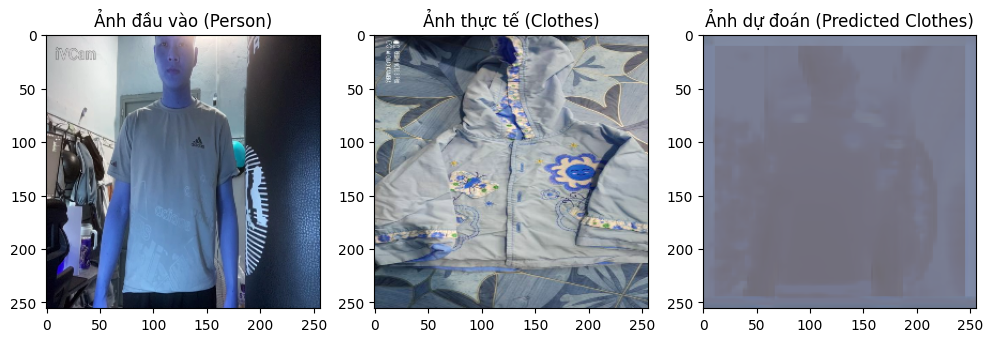

In [13]:
import matplotlib.pyplot as plt

# Dự đoán trên một mẫu ảnh
sample_idx = 0  # Bạn có thể chọn bất kỳ chỉ số nào trong tập dữ liệu
sample_person = np.expand_dims(X_person[sample_idx], axis=0)
predicted_clothes = unet_model.predict(sample_person)[0]

# Hiển thị ảnh đầu vào, ảnh thực tế và ảnh dự đoán
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Ảnh đầu vào (Person)")
plt.imshow(X_person[sample_idx])

plt.subplot(1, 3, 2)
plt.title("Ảnh thực tế (Clothes)")
plt.imshow(X_clothes[sample_idx])

plt.subplot(1, 3, 3)
plt.title("Ảnh dự đoán (Predicted Clothes)")
plt.imshow(predicted_clothes)

plt.show()

In [2]:
Load_data = r'D:\Shop_Thoi_Trang_Ao\YOLO_Person\seg_v8'

In [3]:
%cd D:\Shop_Thoi_Trang_Ao\YOLO_Person\seg_v8

D:\Shop_Thoi_Trang_Ao\YOLO_Person\seg_v8


In [4]:
%pwd

'D:\\Shop_Thoi_Trang_Ao\\YOLO_Person\\seg_v8'

In [5]:
%pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


In [8]:
from ultralytics import YOLO

# Load a YOLOv8 segmentation model
model = YOLO("yolov8n-seg.pt")

# Train the model on your custom dataset
results = model.train(data="D:/Shop_Thoi_Trang_Ao/YOLO_Person/seg_v8/data.yaml", epochs=100, imgsz=640, batch=16, patience=0)

New https://pypi.org/project/ultralytics/8.3.9 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.7  Python-3.10.15 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050 6GB Laptop GPU, 6144MiB)
engine\trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=D:/Shop_Thoi_Trang_Ao/YOLO_Person/seg_v8/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, 

train: Scanning C:\Users\LENOVO\Desktop\UTP\UTP_Data_YOLOv8\train\labels.cache... 270 images, 0 backgrounds, 0 corrupt: 100%|██████████| 270/270 [00:00<?, ?it/s]
val: Scanning C:\Users\LENOVO\Desktop\UTP\UTP_Data_YOLOv8\valid\labels.cache... 26 images, 0 backgrounds, 0 corrupt: 100%|██████████| 26/26 [00:00<?, ?it/s]


Plotting labels to runs\segment\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 72 weight(decay=0.0), 83 weight(decay=0.0005), 82 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\segment\train4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/17 [00:00<?, ?it/s]


TypeError: ERROR ❌ segment dataset incorrectly formatted or not a segment dataset.
This error can occur when incorrectly training a 'segment' model on a 'detect' dataset, i.e. 'yolo train model=yolov8n-seg.pt data=coco8.yaml'.
Verify your dataset is a correctly formatted 'segment' dataset using 'data=coco8-seg.yaml' as an example.
See https://docs.ultralytics.com/datasets/segment/ for help.

In [7]:
import locale
print(locale.getpreferredencoding())
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

UTF-8


In [1]:
%pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ultralytics import YOLO
!yolo predict model=r'D:\Shop_Thoi_Trang_Ao\Model\segmention_Yolov8.pt' source=r'D:\Shop_Thoi_Trang_Ao\data\image_208.jpg'

Ultralytics 8.3.7 🚀 Python-3.10.15 torch-2.4.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050 6GB Laptop GPU, 6144MiB)
YOLOv8s-seg summary (fused): 213 layers, 10,482,841 parameters, 0 gradients, 37.3 GFLOPs

image 1/1 D:\Shop_Thoi_Trang_Ao\data\image_208.jpg: 480x640 1 T_shirt, 74.9ms
Speed: 3.7ms preprocess, 74.9ms inference, 171.8ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs\segment\predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
%pip install ultralytics

In [5]:
from ultralytics import YOLO
import cv2
import numpy as np
import os

# Đường dẫn tới các mô hình YOLO cho phân đoạn người và áo
person_model_path = r'D:\Shop_Thoi_Trang_Ao\hihi.v1i.yolov11\hihi.pt'
shirt_model_path = r'D:\Shop_Thoi_Trang_Ao\segment\train\weights\best.pt'
person_model = YOLO(person_model_path)
shirt_model = YOLO(shirt_model_path)

# Thư mục chứa ảnh đầu vào và đầu ra
person_image_folder = r'D:\Shop_Thoi_Trang_Ao\data\Person'
clothes_image_folder = r'D:\Shop_Thoi_Trang_Ao\data\Clothes'
output_person_folder = r'D:\Shop_Thoi_Trang_Ao\data\output_masks\Person'
output_clothes_folder = r'D:\Shop_Thoi_Trang_Ao\data\output_masks\Clothes'

# Tạo các thư mục đầu ra nếu chưa tồn tại
os.makedirs(output_person_folder, exist_ok=True)
os.makedirs(output_clothes_folder, exist_ok=True)

def segment_image(model, image_path, output_path):
    # Đọc ảnh đầu vào
    image = cv2.imread(image_path)
    
    # Chuyển đổi ảnh sang RGB (YOLO yêu cầu định dạng RGB)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Thực hiện phân đoạn bằng YOLO
    results = model(image_rgb)

    # Kiểm tra nếu có mask trong kết quả
    if results[0].masks is not None:
        # Lấy mask từ kết quả YOLO
        mask = (results[0].masks.data[0].cpu().numpy() * 255).astype("uint8")

        # Thay đổi kích thước của mask để khớp với kích thước ảnh gốc
        mask_resized = cv2.resize(mask, (image.shape[1], image.shape[0]))

        # Chuyển đổi mask thành ảnh ba kênh để dễ dàng ghép với ảnh gốc
        mask_rgb = cv2.cvtColor(mask_resized, cv2.COLOR_GRAY2BGR)
        
        # Tạo ảnh phân đoạn bằng cách nhân mask với ảnh gốc
        segmented_image = cv2.bitwise_and(image, mask_rgb)

        # Lưu kết quả vào thư mục đầu ra
        cv2.imwrite(output_path, segmented_image)
        print(f"Lưu ảnh phân đoạn vào: {output_path}")
    else:
        print(f"Không tìm thấy đối tượng trong ảnh: {image_path}")

# Xử lý ảnh trong thư mục 'Person'
for filename in os.listdir(person_image_folder):
    image_path = os.path.join(person_image_folder, filename)
    output_path = os.path.join(output_person_folder, f"person_segmented_{filename}")
    segment_image(person_model, image_path, output_path)

# Xử lý ảnh trong thư mục 'Clothes'
for filename in os.listdir(clothes_image_folder):
    image_path = os.path.join(clothes_image_folder, filename)
    output_path = os.path.join(output_clothes_folder, f"clothes_segmented_{filename}")
    segment_image(shirt_model, image_path, output_path)



0: 480x640 1 u, 59.0ms
Speed: 3.0ms preprocess, 59.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Lưu ảnh phân đoạn vào: D:\Shop_Thoi_Trang_Ao\data\output_masks\Person\person_segmented_abc (1).jpg

0: 480x640 1 u, 45.0ms
Speed: 3.0ms preprocess, 45.0ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)
Lưu ảnh phân đoạn vào: D:\Shop_Thoi_Trang_Ao\data\output_masks\Person\person_segmented_abc (10).jpg

0: 480x640 1 u, 16.0ms
Speed: 2.0ms preprocess, 16.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Lưu ảnh phân đoạn vào: D:\Shop_Thoi_Trang_Ao\data\output_masks\Person\person_segmented_abc (100).jpg

0: 480x640 1 u, 18.0ms
Speed: 2.0ms preprocess, 18.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)
Lưu ảnh phân đoạn vào: D:\Shop_Thoi_Trang_Ao\data\output_masks\Person\person_segmented_abc (101).jpg

0: 480x640 1 u, 18.6ms
Speed: 2.0ms preprocess, 18.6ms inference, 2.0ms postprocess per image at shape (1, 3, 480,

In [8]:
import cv2
import numpy as np
import os

# Đường dẫn đến thư mục chứa ảnh và mask
person_folder = r'D:\Shop_Thoi_Trang_Ao\data\output_masks\Person'
clothes_folder = r'D:\Shop_Thoi_Trang_Ao\data\output_masks\Clothes'
output_folder = r'D:\Shop_Thoi_Trang_Ao\data\output_masks\Combined'

# Tạo thư mục đầu ra nếu chưa tồn tại
os.makedirs(output_folder, exist_ok=True)

def overlay_shirt_on_person(person_path, shirt_path, output_path):
    # Đọc ảnh người và ảnh áo
    person_img = cv2.imread(person_path, cv2.IMREAD_COLOR)
    shirt_img = cv2.imread(shirt_path, cv2.IMREAD_COLOR)

    # Chuyển đổi ảnh người và áo sang mask
    person_mask = cv2.cvtColor(person_img, cv2.COLOR_BGR2GRAY)
    shirt_mask = cv2.cvtColor(shirt_img, cv2.COLOR_BGR2GRAY)

    # Thay đổi kích thước ảnh áo để khớp với vùng người
    h, w = person_img.shape[:2]
    shirt_resized = cv2.resize(shirt_img, (w, h))

    # Tạo mask cho áo đã resize
    shirt_resized_mask = cv2.resize(shirt_mask, (w, h))

    # Tạo vùng đặt áo trên ảnh người bằng mask
    person_region = cv2.bitwise_and(person_img, person_img, mask=cv2.bitwise_not(person_mask))
    shirt_segmented = cv2.bitwise_and(shirt_resized, shirt_resized, mask=shirt_resized_mask)

    # Chồng ảnh áo lên ảnh người
    combined_img = cv2.add(person_region, shirt_segmented)

    # Lưu ảnh kết quả
    cv2.imwrite(output_path, combined_img)
    print(f"Lưu ảnh kết hợp vào: {output_path}")

# Xử lý ảnh trong thư mục 'Person'
for person_file in os.listdir(person_folder):
    person_path = os.path.join(person_folder, person_file)
    print(f"Đang xử lý ảnh người: {person_file}")

    # Tìm file áo tương ứng
    matching_clothes_file = None
    for clothes_file in os.listdir(clothes_folder):
        # In tên file đang so sánh để kiểm tra
        print(f" So sánh với ảnh áo: {clothes_file}")

        # Nếu tên file áo có phần chữ tương ứng với file người
        if clothes_file.startswith("clothes_segmented_" + person_file.split("person_segmented_")[-1]):
            matching_clothes_file = clothes_file
            break

    if matching_clothes_file:
        shirt_path = os.path.join(clothes_folder, matching_clothes_file)
        output_path = os.path.join(output_folder, f"combined_{person_file}")
        overlay_shirt_on_person(person_path, shirt_path, output_path)
    else:
        print(f"Không tìm thấy ảnh áo tương ứng cho: {person_file}")


Đang xử lý ảnh người: person_segmented_abc (1).jpg
 So sánh với ảnh áo: clothes_segmented_abc (1).png
 So sánh với ảnh áo: clothes_segmented_abc (28).png
 So sánh với ảnh áo: clothes_segmented_abc (29).png
 So sánh với ảnh áo: clothes_segmented_abc (30).png
 So sánh với ảnh áo: clothes_segmented_abc (31).png
 So sánh với ảnh áo: clothes_segmented_abc (32).png
 So sánh với ảnh áo: clothes_segmented_abc (33).png
 So sánh với ảnh áo: clothes_segmented_abc (34).png
 So sánh với ảnh áo: clothes_segmented_abc (35).png
 So sánh với ảnh áo: clothes_segmented_abc (36).png
 So sánh với ảnh áo: clothes_segmented_abc (37).png
 So sánh với ảnh áo: clothes_segmented_abc (38).png
 So sánh với ảnh áo: clothes_segmented_abc (39).png
 So sánh với ảnh áo: clothes_segmented_abc (40).png
 So sánh với ảnh áo: clothes_segmented_abc (41).png
 So sánh với ảnh áo: clothes_segmented_abc (42).png
 So sánh với ảnh áo: clothes_segmented_abc (43).png
 So sánh với ảnh áo: clothes_segmented_abc (44).png
 So sánh với ả